# Configuration

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from nltk.corpus import stopwords
import nltk
warnings.filterwarnings('ignore')

# Uploading Data

In [64]:
PATH = ''
df = pd.read_csv(PATH+'spotify_songs.csv')
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


# Handling Missing Values

In [65]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [66]:
# see which columns have missing values
df[df.isnull().any(axis=1)]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [67]:
# remove rows with any missing value 
df = df.dropna()

# Data Visualization

### Word Cloud

In [68]:
#pip install wordcloud and nltk

In [69]:
df['track_album_release_date'] = df['track_album_release_date'].astype(str).str.strip()
df['year'] = df['track_album_release_date'].str[:4]
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [70]:
# avoid including version information
df['track_name_cleaned'] = df['track_name'].str.lower()
df['track_name_cleaned'] = df['track_name_cleaned'].str.split('-').str[0].str.strip()
df['track_name_cleaned'] = df['track_name_cleaned'].str.split('feat', expand=True)[0].str.strip()
df['track_name_cleaned'] = df['track_name_cleaned'].str.split('emix', expand=True)[0].str.strip()

nltk.download('stopwords')
custom_stop_words = ['de', 'la',"el"]
stop_words = set(stopwords.words('english')).union(custom_stop_words)
df['track_name_cleaned'] = df['track_name_cleaned'].apply(
    lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words)
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hayoon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


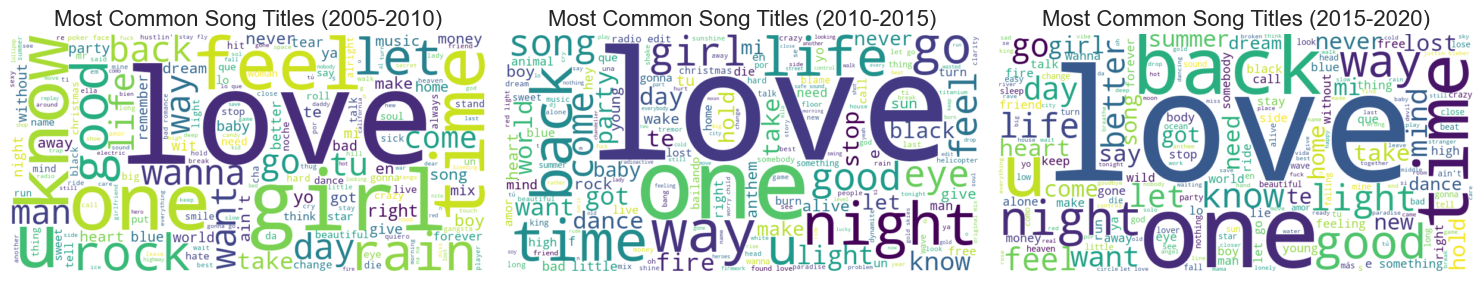

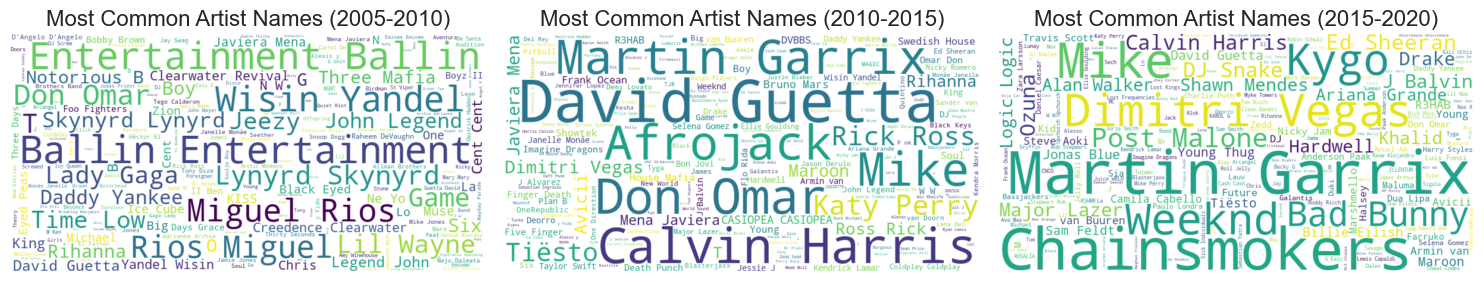

In [71]:

year_ranges = [(2005, 2010), (2010, 2015), (2015, 2020)]
title_text_cleaned = {}
artist_text = {}

for start_year, end_year in year_ranges:
    filtered_range_data = df[(df['year'] >= start_year) & (df['year'] < end_year)]
    range_label = f"{start_year}-{end_year}"
    title_text_cleaned[range_label] = ' '.join(filtered_range_data['track_name_cleaned'].dropna().astype(str))
    artist_text[range_label] = ' '.join(filtered_range_data['track_artist'].dropna().astype(str))
plt.figure(figsize=(15, 8))
for i, range_label in enumerate(title_text_cleaned.keys()):
    plt.subplot(1, 3, i + 1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text_cleaned[range_label])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Most Common Song Titles ({range_label})", fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
for i, range_label in enumerate(artist_text.keys()):
    plt.subplot(1, 3, i + 1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(artist_text[range_label])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Most Common Artist Names ({range_label})", fontsize=16)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Histograms of Song Duration

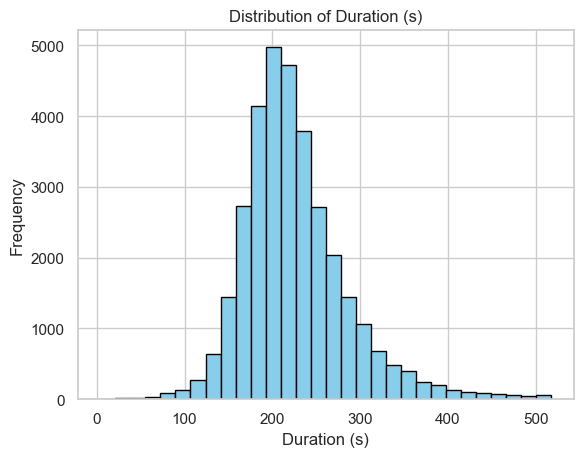

In [72]:
# overall distribution of duration_ms
df['duration_s'] = df['duration_ms'] / 1000
overall_duration = df['duration_s']

plt.hist(overall_duration, bins=30, color = 'skyblue', edgecolor='black')
plt.xlabel('Duration (s)')
plt.ylabel('Frequency')
plt.title('Distribution of Duration (s)')

plt.show()

In [73]:
genres = df['playlist_genre'].unique()

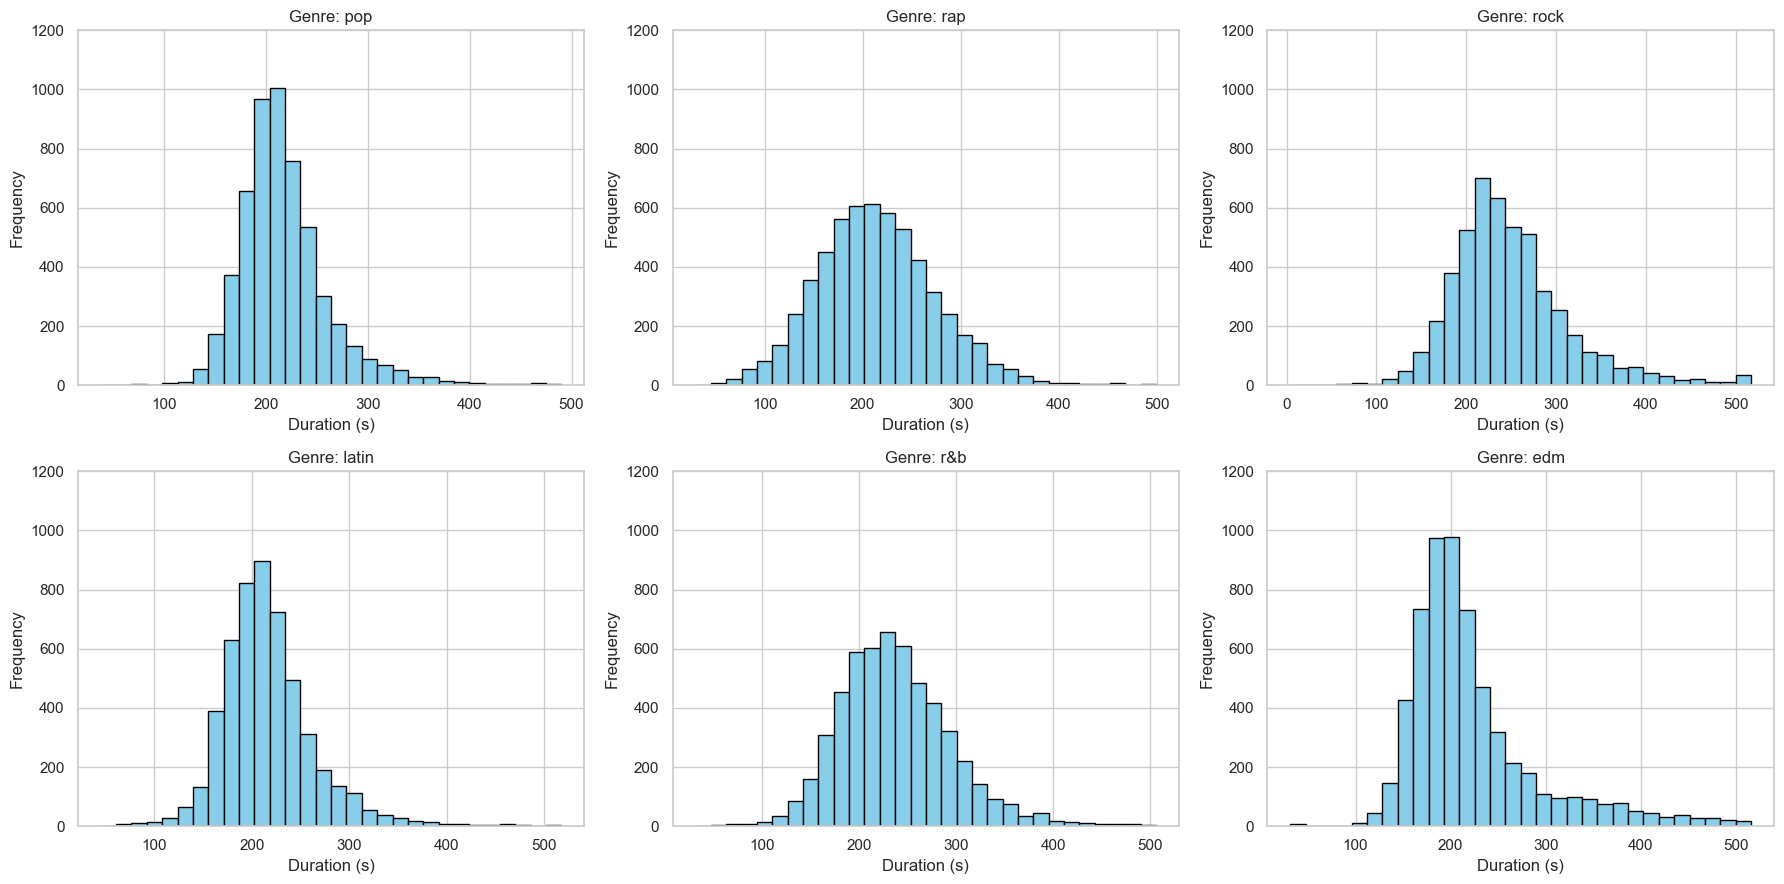

In [74]:
fig, axes = plt.subplots(2, 3, figsize=(18, 9))
axes = axes.flatten()
y_lim = 1200

for i, genre in enumerate(genres):
    duration_by_genre = df[df['playlist_genre'] == genre]['duration_s']

    ax = axes[i]
    ax.hist(duration_by_genre, bins=30, color = 'skyblue', edgecolor='black')
    ax.set_title(f'Genre: {genre}')
    ax.set_xlabel('Duration (s)')
    ax.set_ylabel('Frequency')
    ax.set_ylim(0, y_lim)


plt.tight_layout()
plt.show()

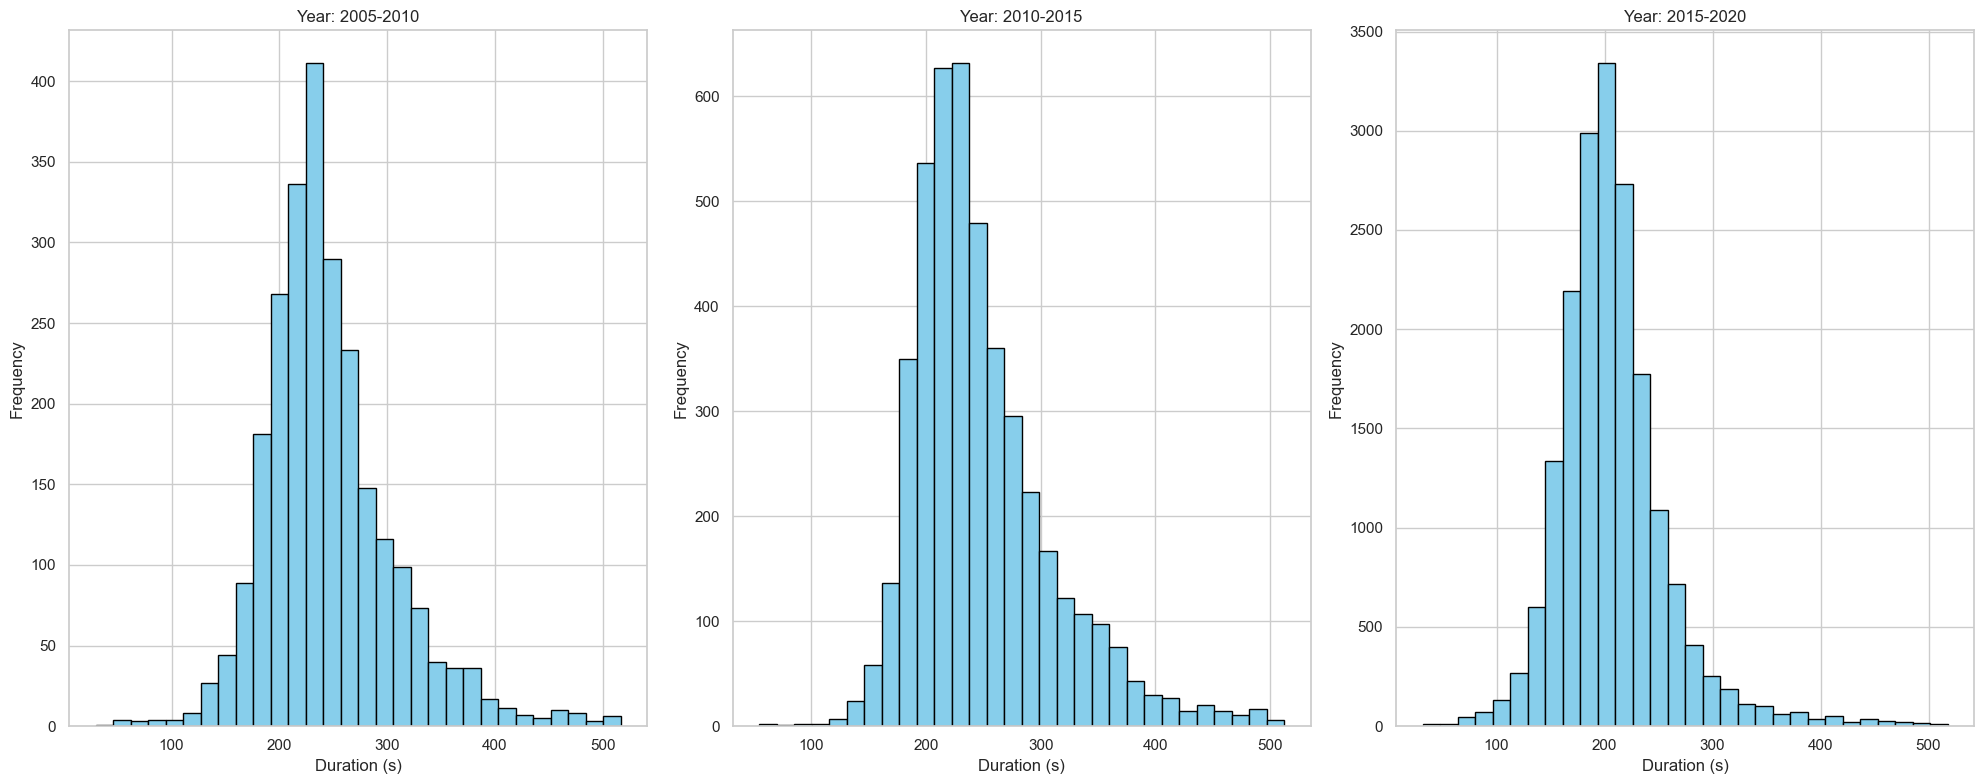

In [75]:
year_ranges = [(2005, 2010), (2010, 2015), (2015, 2020)]
fig, axes = plt.subplots(1, len(year_ranges), figsize=(20, 8))
axes = axes.flatten()

for i, (start_year, end_year) in enumerate(year_ranges):
    duration_by_year = df[(df['year'] >= start_year) & (df['year'] < end_year)]['duration_s']
    year_label = f"{start_year}-{end_year}"

    ax = axes[i]
    ax.hist(duration_by_year, bins=30, color = 'skyblue', edgecolor='black')
    ax.set_title(f'Year: {year_label}')
    ax.set_xlabel('Duration (s)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

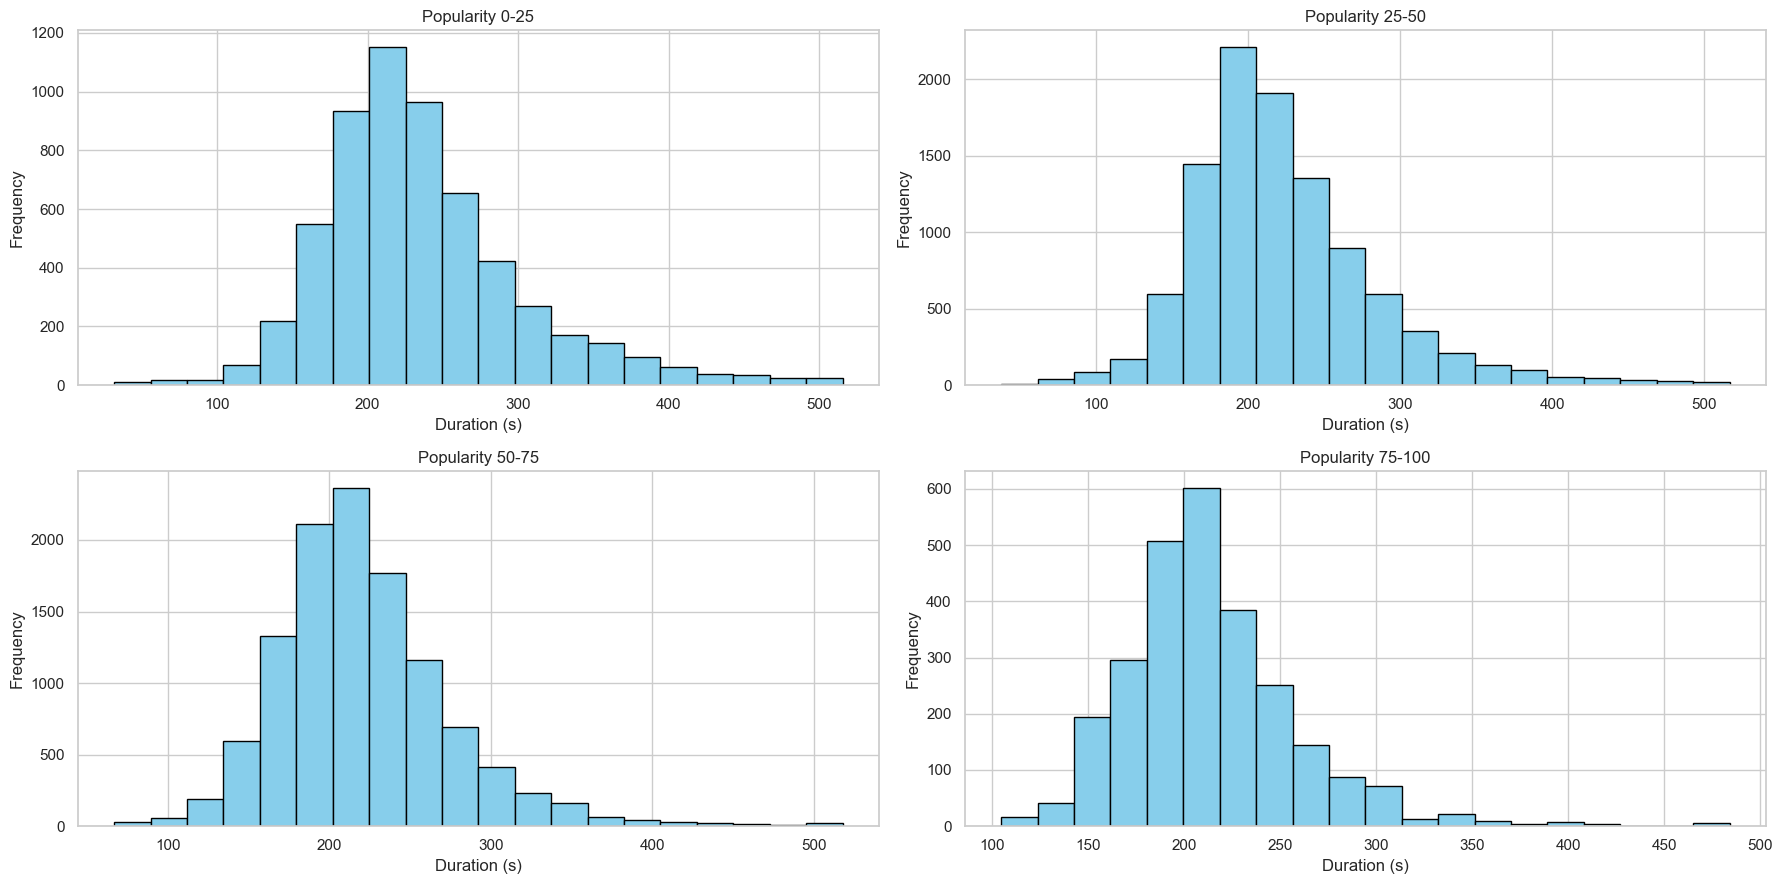

In [76]:
pop_min = df['track_popularity'].min()
pop_max = df['track_popularity'].max()

ranges = np.linspace(pop_min, pop_max, 5) 
range_labels = [f'{int(ranges[i])}-{int(ranges[i+1])}' for i in range(4)]

fig, axes = plt.subplots(2, 2, figsize=(18, 9))
axes = axes.flatten()

for i in range(4):
    low, high = ranges[i], ranges[i+1]
    
    duration_by_popularity = df[(df['track_popularity'] > low) & (df['track_popularity'] <= high)]['duration_s']
    
    ax = axes[i]
    ax.hist(duration_by_popularity, bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Popularity {range_labels[i]}')
    ax.set_xlabel('Duration (s)')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Track popularity

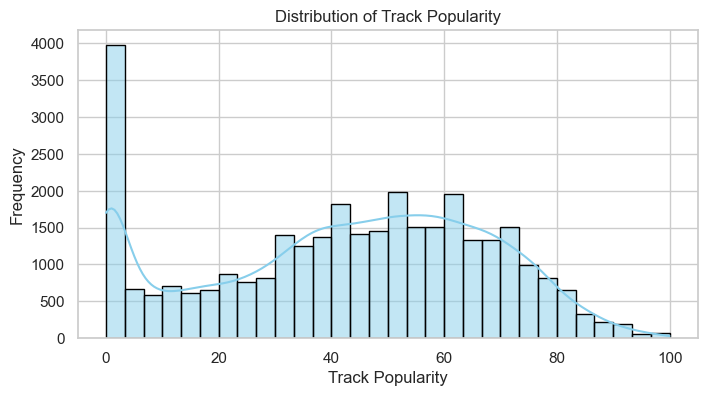

In [77]:
# popularity distribution for all kinds of songs
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="track_popularity", kde=True, bins=30, color="skyblue", edgecolor='black')
plt.title("Distribution of Track Popularity")
plt.xlabel("Track Popularity")
plt.ylabel("Frequency")
plt.show()

In [78]:
# Group by genre and calculate mean popularity
genre_popularity = df.groupby("playlist_genre")["track_popularity"].mean().sort_values()
genre_popularity

playlist_genre
edm      34.833526
r&b      41.223532
rock     41.728338
rap      43.238029
latin    47.044828
pop      47.744870
Name: track_popularity, dtype: float64

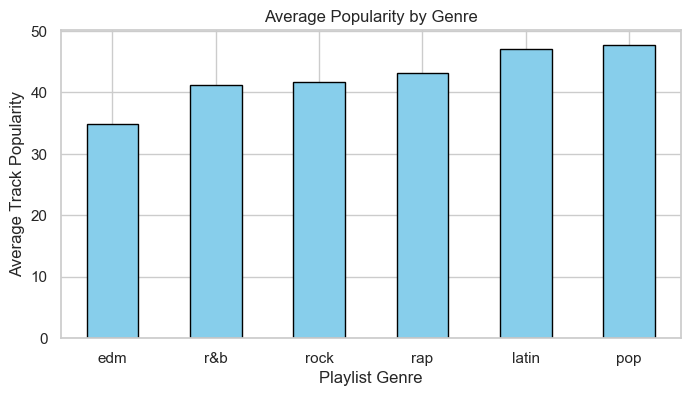

In [79]:
plt.figure(figsize=(8,4))
genre_popularity.plot(kind="bar", color="skyblue", edgecolor='black')
plt.title("Average Popularity by Genre")
plt.xlabel("Playlist Genre")
plt.xticks(rotation=0)
plt.ylabel("Average Track Popularity")
plt.show()

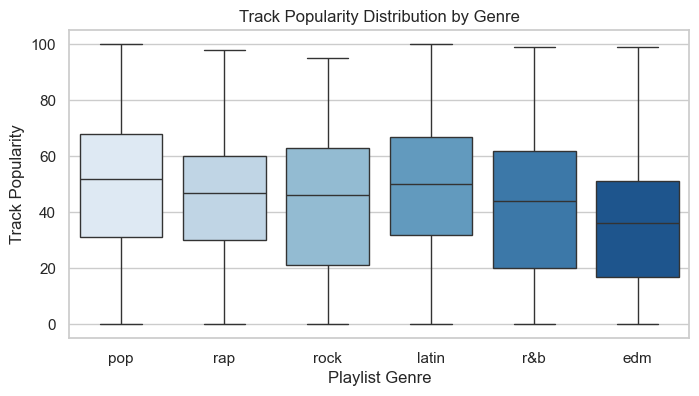

In [80]:
plt.figure(figsize=(8,4))
sns.set_theme(style="whitegrid")

sns.boxplot(data=df, x="playlist_genre", y="track_popularity", palette="Blues")
plt.title("Track Popularity Distribution by Genre")
plt.xlabel("Playlist Genre")
plt.ylabel("Track Popularity")
plt.xticks(rotation=0)
plt.show()

In [81]:
# get release date in datetime version
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
df['release_year'] = df['track_album_release_date'].dt.year

# Group by release year and calculate mean popularity
yearly_popularity = df.groupby("release_year")["track_popularity"].mean()
yearly_popularity

release_year
1957.0    59.000000
1958.0    73.000000
1961.0    47.000000
1963.0    36.250000
1964.0    42.750000
            ...    
2016.0    38.479659
2017.0    41.823020
2018.0    45.878623
2019.0    51.408415
2020.0    46.461146
Name: track_popularity, Length: 61, dtype: float64

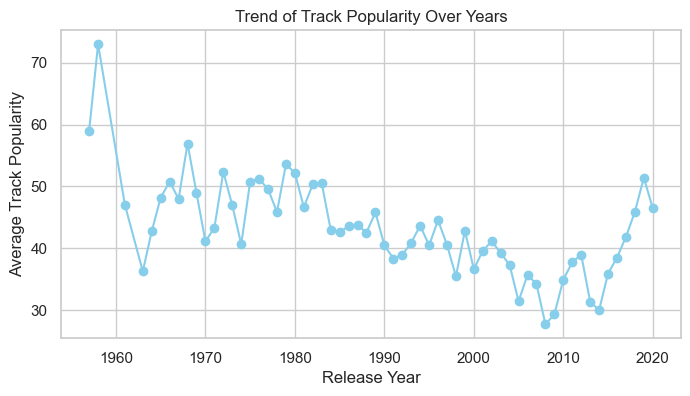

In [82]:
# Plot popularity trend over years
plt.figure(figsize=(8,4))
plt.plot(yearly_popularity.index, yearly_popularity.values, marker="o", linestyle="-", color="skyblue")
plt.title("Trend of Track Popularity Over Years")
plt.xlabel("Release Year")
plt.ylabel("Average Track Popularity")
plt.grid(True)
plt.show()

In [83]:
# average popularity of each genre in different years
genre_year_popularity = df.groupby(['playlist_genre', 'release_year'])['track_popularity'].mean().reset_index()
genre_year_popularity

,playlist_genre,release_year,track_popularity
0,edm,1980.0,29.000000
1,edm,1981.0,69.000000
2,edm,1990.0,35.000000
3,edm,1995.0,33.000000
4,edm,1996.0,42.000000
...,...,...,...
268,rock,2016.0,38.155844
269,rock,2017.0,37.112069
270,rock,2018.0,40.968992
271,rock,2019.0,36.178510


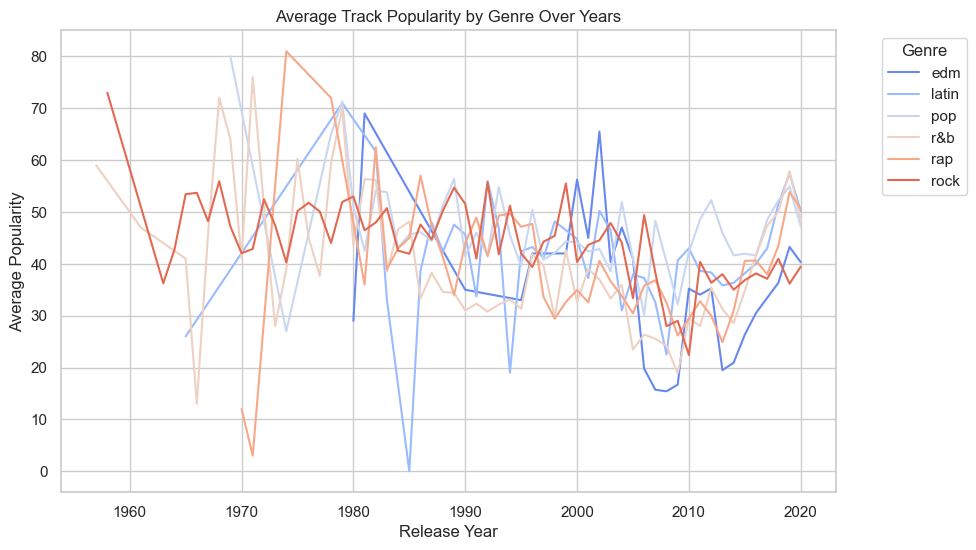

In [84]:
plt.figure(figsize=(10,6))
sns.lineplot(data=genre_year_popularity, x='release_year', y='track_popularity', hue='playlist_genre', palette='coolwarm')

plt.title('Average Track Popularity by Genre Over Years')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

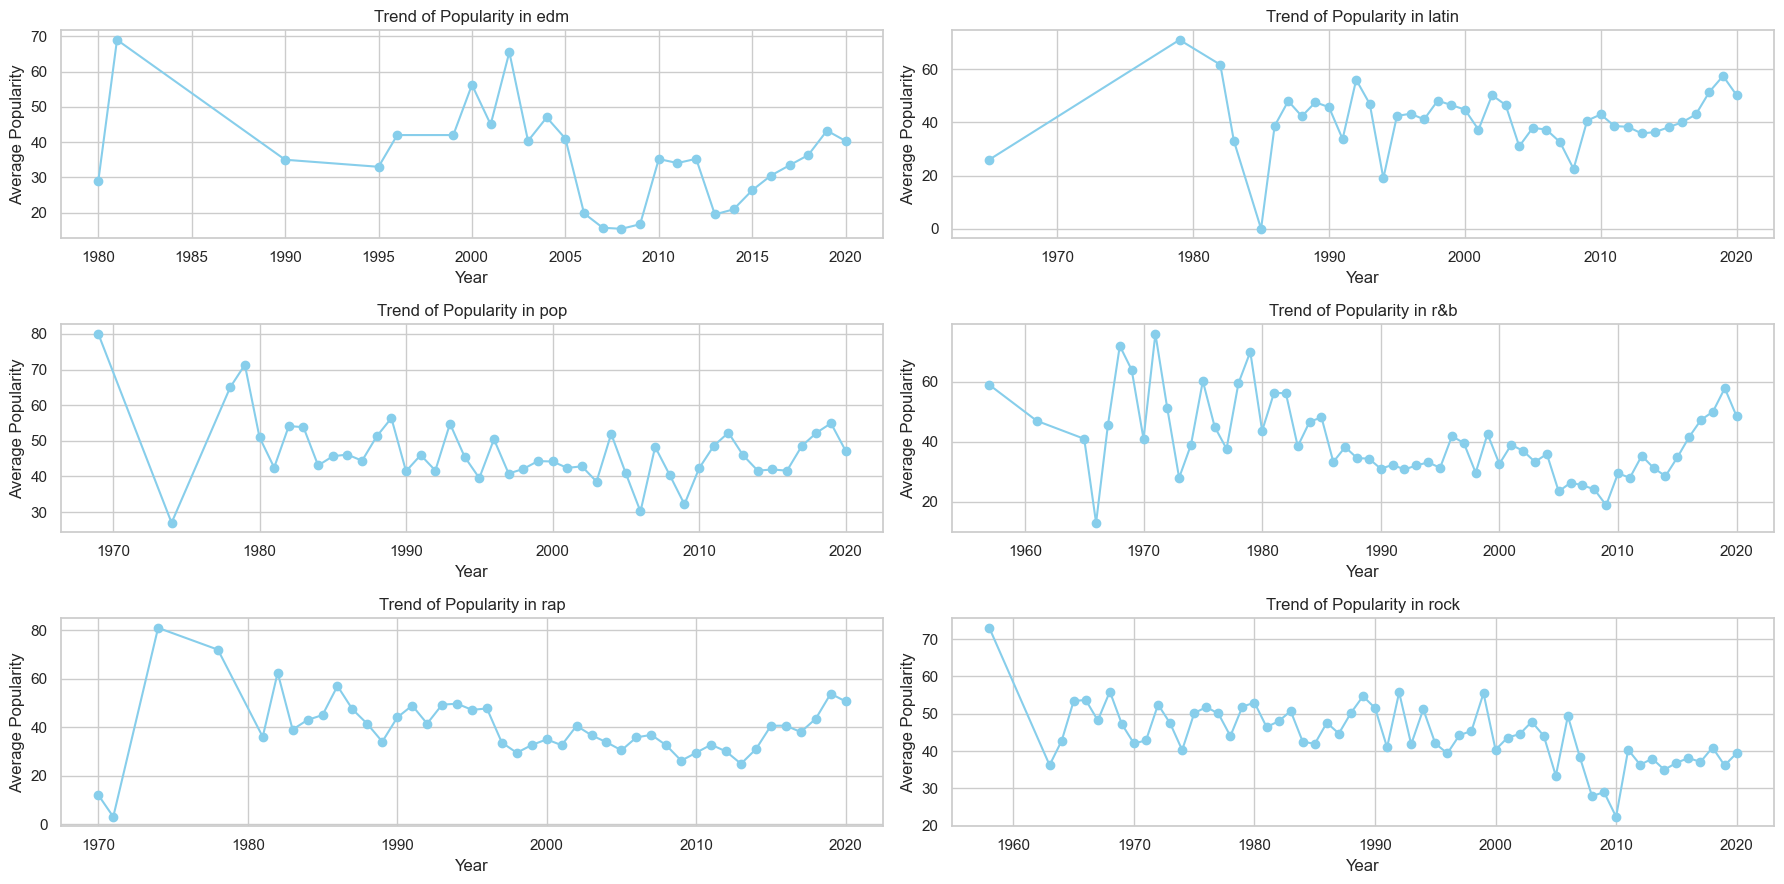

In [85]:
genres = genre_year_popularity["playlist_genre"].unique()

n_genres = len(genres)
rows = (n_genres + 1) // 2
fig, axes = plt.subplots(rows, 2, figsize=(18, 9))
axes = axes.flatten()

for i, genre in enumerate(genres):
    ax = axes[i]
    genre_data = genre_year_popularity[genre_year_popularity["playlist_genre"] == genre]
    ax.plot(genre_data["release_year"], genre_data["track_popularity"], marker="o", color="skyblue")
    ax.set_title(f"Trend of Popularity in {genre}", fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("Average Popularity")
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

In [86]:
genre_year_counts = df.groupby(['playlist_genre', 'release_year']).size().reset_index(name="new_songs")
genre_year_counts

,playlist_genre,release_year,new_songs
0,edm,1980.0,1
1,edm,1981.0,1
2,edm,1990.0,1
3,edm,1995.0,1
4,edm,1996.0,1
...,...,...,...
268,rock,2016.0,77
269,rock,2017.0,116
270,rock,2018.0,129
271,rock,2019.0,577


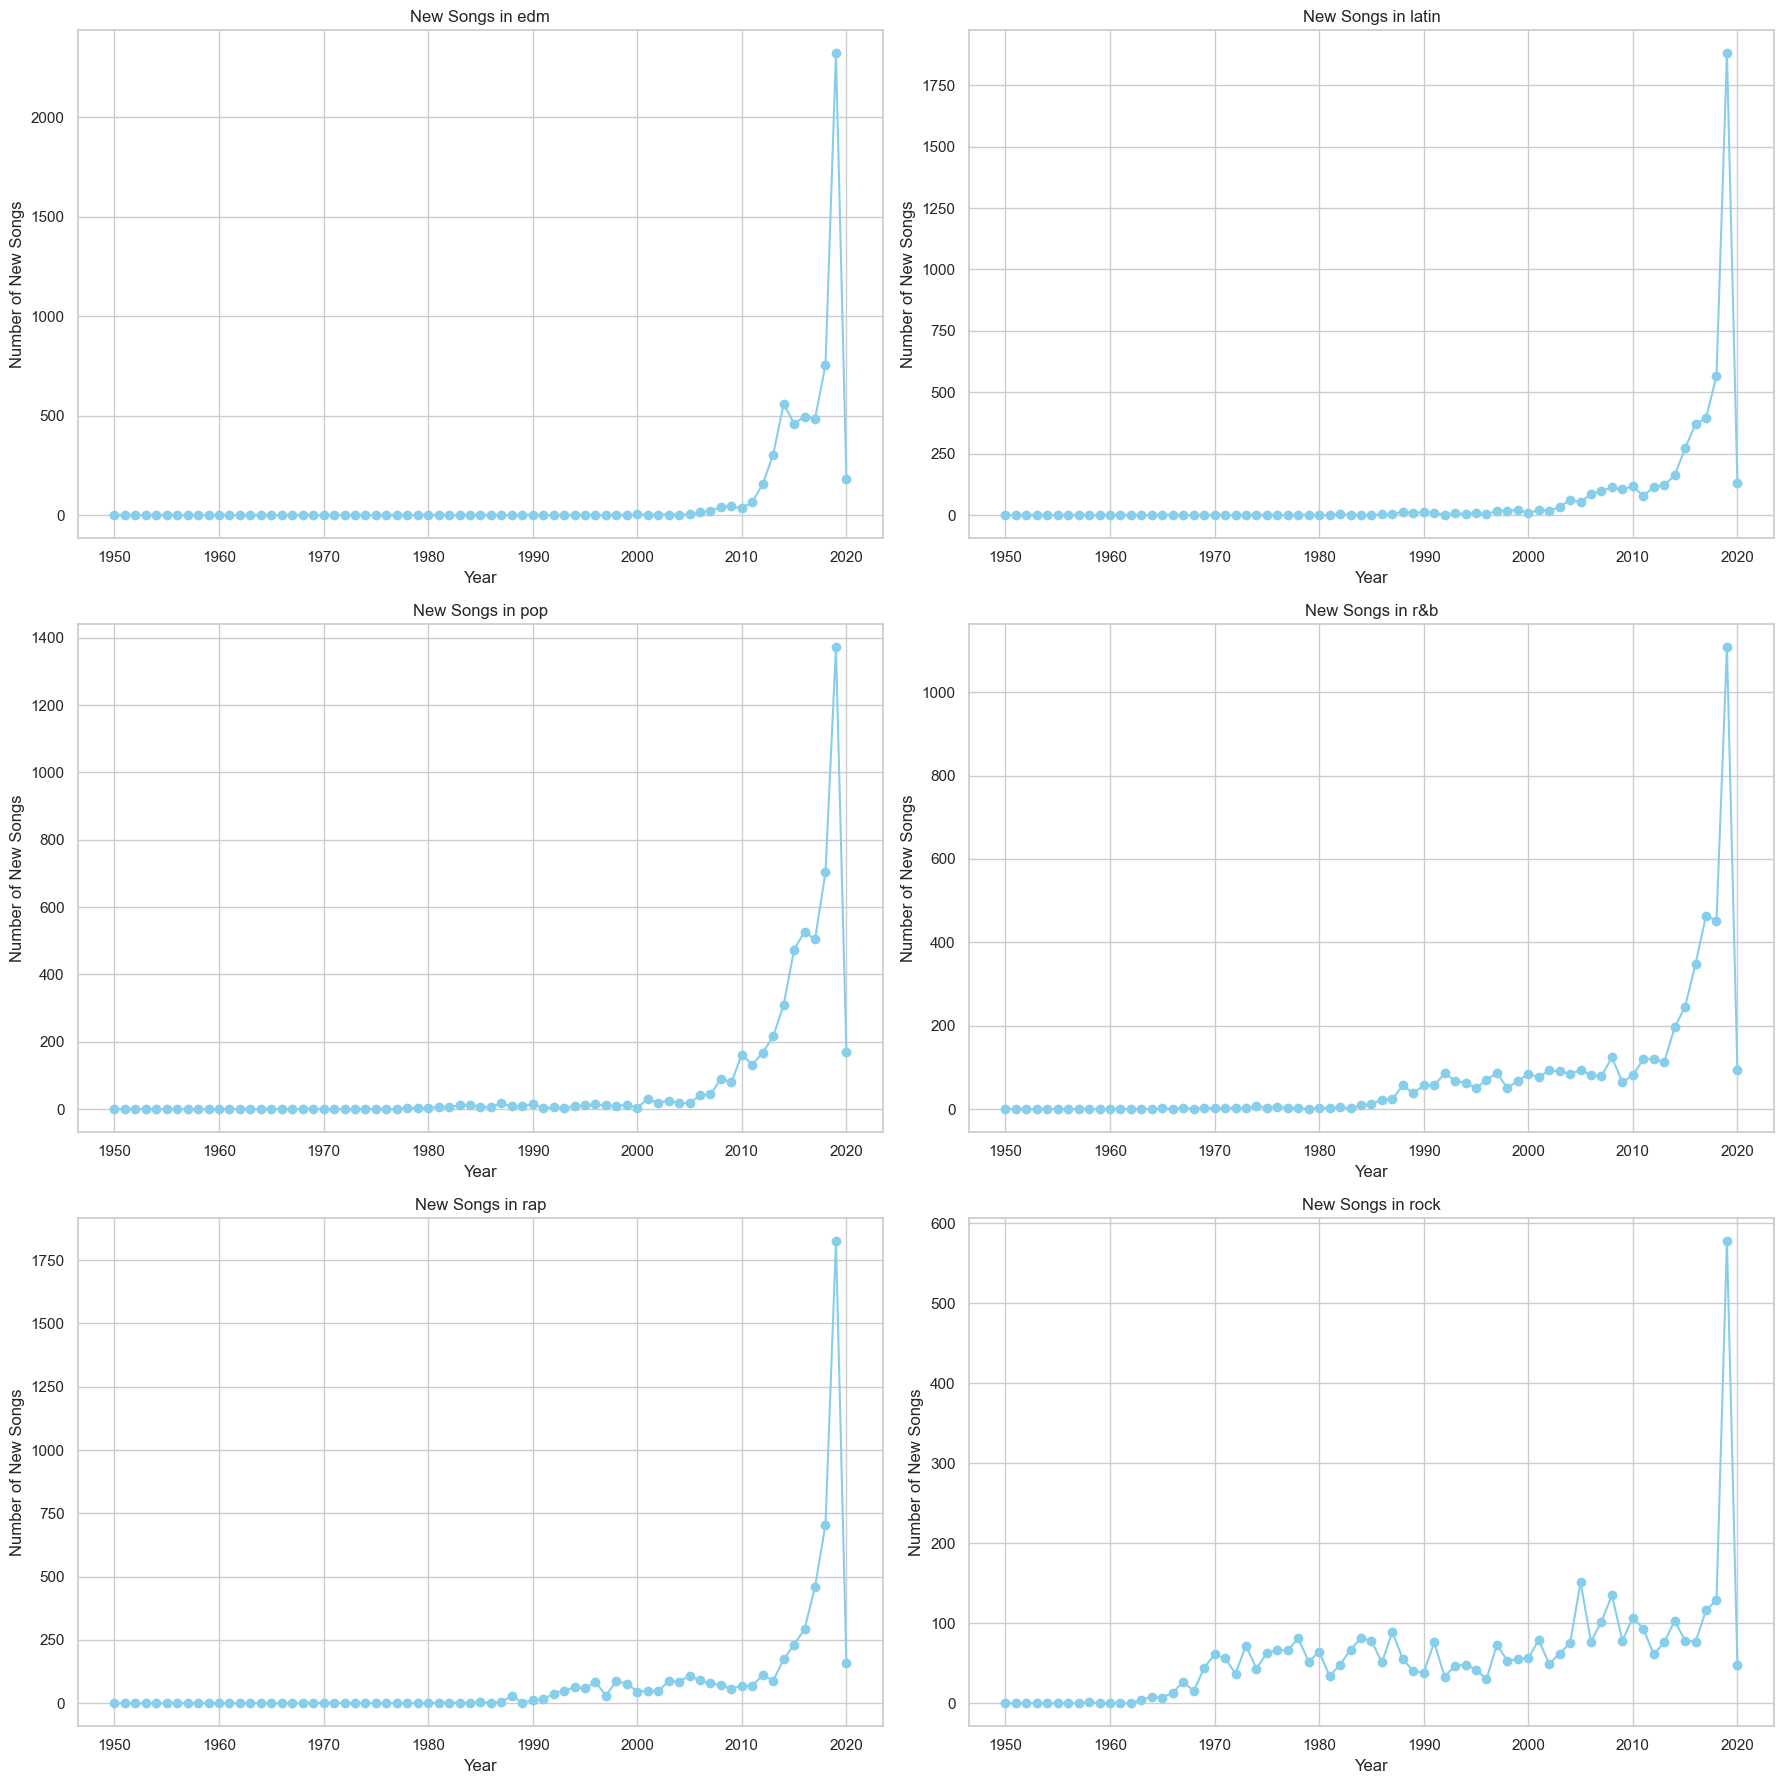

In [87]:
genres = genre_year_counts["playlist_genre"].unique()

n_genres = len(genres)
rows = (n_genres + 1) // 2 
fig, axes = plt.subplots(rows, 2, figsize=(18, 18))
axes = axes.flatten()

start_year = 1950
end_year = 2020
all_years = np.arange(start_year, end_year + 1)

complete_data = []
for genre in genres:
    genre_data = genre_year_counts[genre_year_counts["playlist_genre"] == genre]
    genre_data = genre_data.set_index("release_year").reindex(all_years, fill_value=0).reset_index()
    genre_data["playlist_genre"] = genre
    complete_data.append(genre_data)

genre_year_counts = pd.concat(complete_data, ignore_index=True)

for i, genre in enumerate(genres):
    ax = axes[i]
    genre_data = genre_year_counts[genre_year_counts["playlist_genre"] == genre]
    ax.plot(genre_data["release_year"], genre_data["new_songs"], marker="o", color="skyblue")
    ax.set_title(f"New Songs in {genre}", fontsize=12)
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of New Songs")
    ax.grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Correlation Heatmap

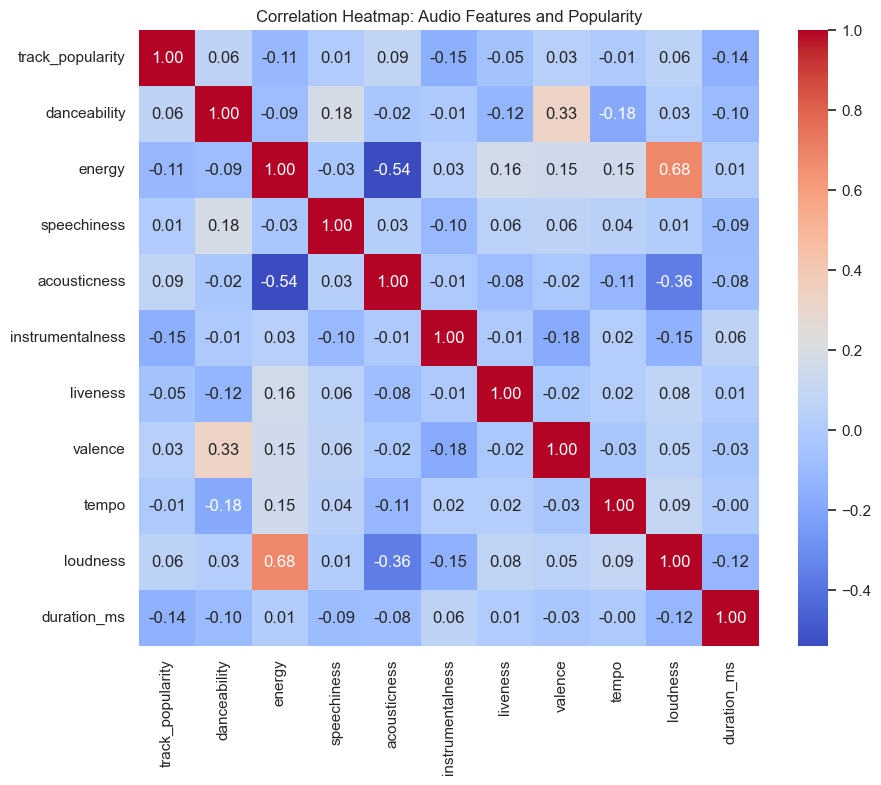

In [88]:
heatmap_features = ['track_popularity', 'danceability', 'energy', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 
                       'tempo', 'loudness', 'duration_ms']
correlation_data = df[heatmap_features]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Heatmap: Audio Features and Popularity')
plt.show()

### Trends

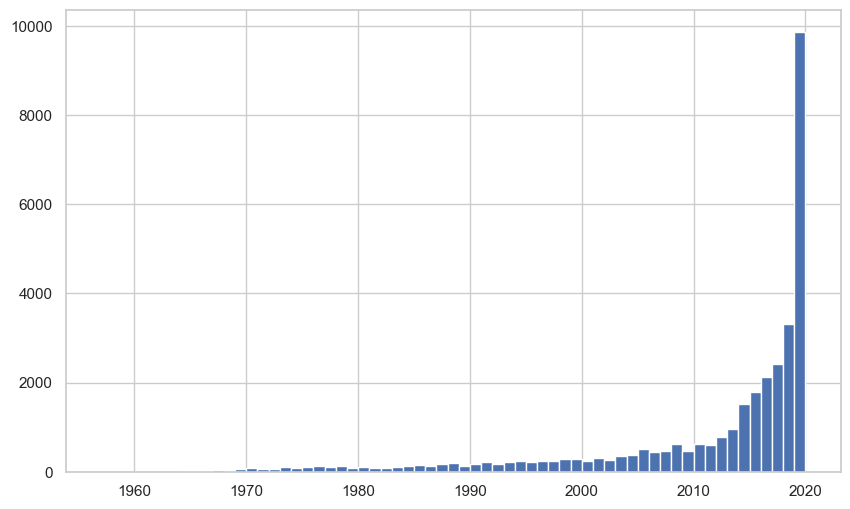

In [89]:
# Plot a histogram of the song release years
plt.figure(figsize=(10, 6))

plt.hist(df['year'].dropna(),bins=63)
plt.show()

In [90]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'year', 'track_name_cleaned', 'duration_s',
       'release_year'],
      dtype='object')

In [91]:
df_10_yrs = df[df['year'].isin([2015,2016,2017,2018,2019])]
# how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
danceability = df_10_yrs.groupby('year')['danceability'].mean()
# measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
energy = df_10_yrs.groupby('year')['energy'].mean()
# The overall loudness of a track in decibels (dB). Values typically range between -60 and 0 db.
loudness = df_10_yrs.groupby('year')['loudness'].mean()
#  modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
mode = df_10_yrs.groupby('year')['mode'].mean()
# detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 
speechiness = df_10_yrs.groupby('year')['speechiness'].mean()
# A confidence measure from 0.0 to 1.0 of whether the track is acoustic
acousticness = df_10_yrs.groupby('year')['acousticness'].mean()
# Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
instrumentalness = df_10_yrs.groupby('year')['instrumentalness'].mean()
# presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live
liveness = df_10_yrs.groupby('year')['liveness'].mean()
# 0.0 to 1.0 describing the musical positiveness conveyed by a track. High valence sound more positive (e.g. happy, cheerful, euphoric),  tracks with low valence sound more negative (e.g. sad, depressed, angry).
valence = df_10_yrs.groupby('year')['valence'].mean()
# overall estimated tempo of a track in beats per minute (BPM)
tempo = df_10_yrs.groupby('year')['tempo'].mean()
# duration of track in milisec
duration = df_10_yrs.groupby('year')['duration_ms'].mean()

Correlation in between -0.3 and 0.3 are negligible. 
Some of the outstanding correlated feaures are: 
- high positive correlation: energy and loudness (0.71)
- moderate negative correlation: energy and acousticness (-0.55)
- low positive correlation: valence and danceability (0.34)
- low negative correlation: acousticness and loudness (-0.41)


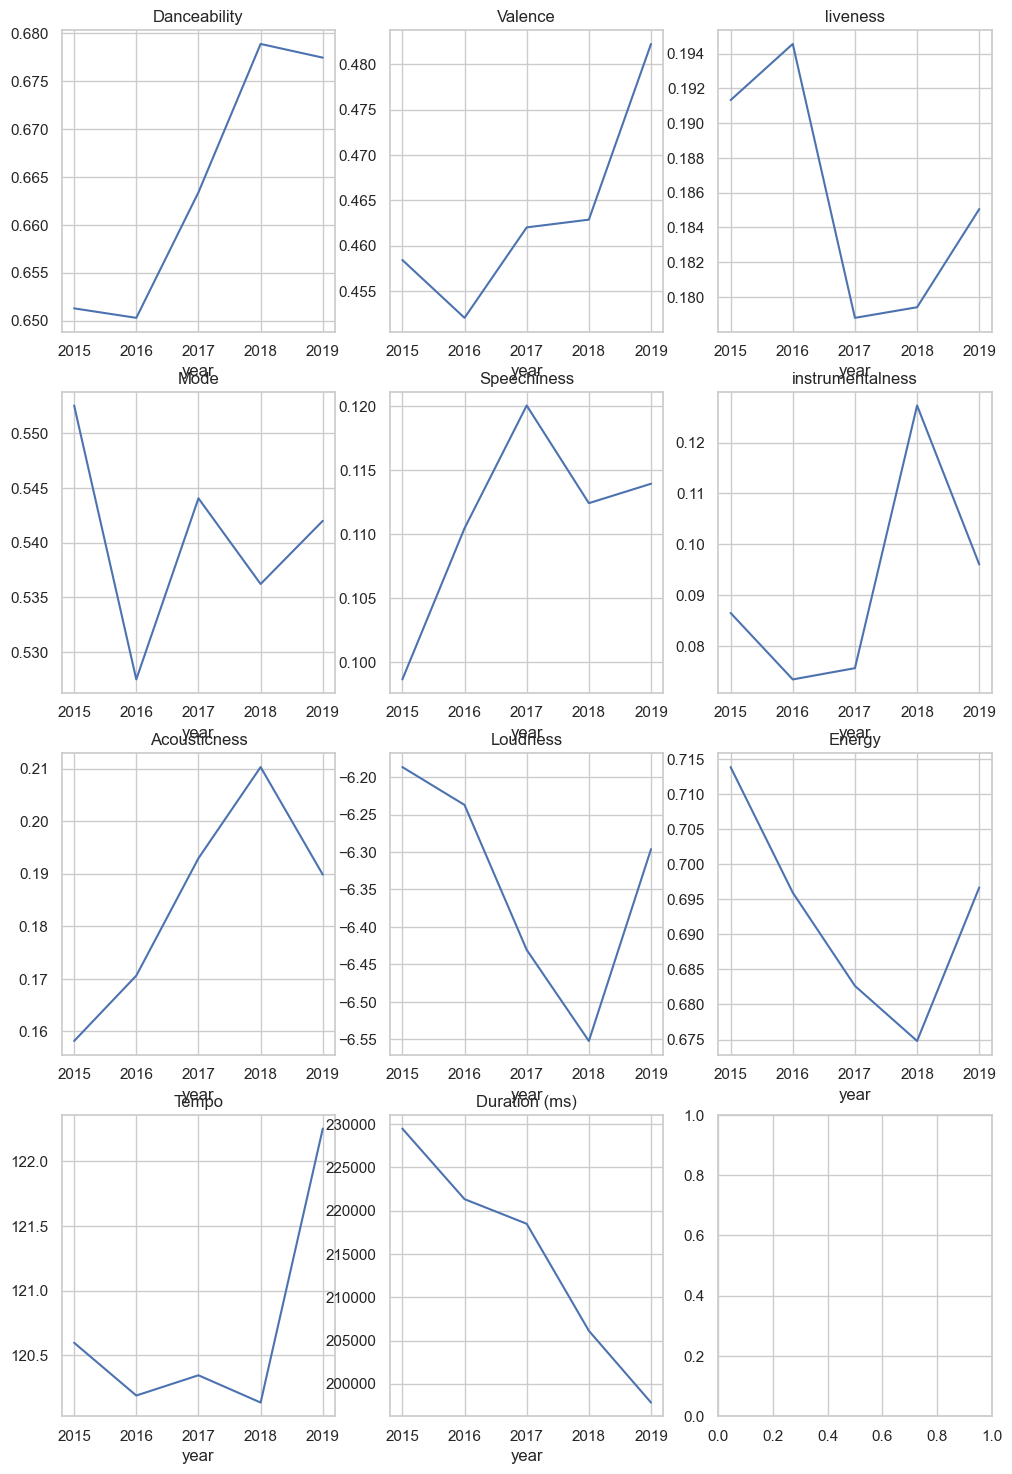

In [92]:
fig, ax = plt.subplots(4,3,figsize=(12,18))
danceability.plot(kind='line', title='Danceability',ax=ax[0,0])
valence.plot(kind='line',title='Valence',ax=ax[0,1])
liveness.plot(kind='line',title='liveness',ax=ax[0,2])

mode.plot(kind='line', title='Mode',ax=ax[1,0])
speechiness.plot(kind='line', title='Speechiness',ax=ax[1,1])
instrumentalness.plot(kind='line',title='instrumentalness',ax=ax[1,2])

acousticness.plot(kind='line', title = 'Acousticness',ax=ax[2,0])
loudness.plot(kind='line', title='Loudness',ax=ax[2,1])
energy.plot(kind='line', title='Energy',ax=ax[2,2])

tempo.plot(kind='line',title='Tempo',ax=ax[3,0])
duration.plot(kind='line',title='Duration (ms)',ax=ax[3,1])

plt.show()

Loudness and Energy have decreasing trend from 2015~2018 and increasing trend from 2018 ~ 2019. Acousticness, on the other hand, follows increasing trend from 2015~2018 and decreasing trend from 2018~2019. The level of change however, is relatively small meaning that the features may not be oustanding among the listeners.  This is highly relevant to the correlation level across these variables.
In general, the duration of the music decreased while tempo increased within the year of 2018~2019 as well as energy and loudness. This is assumed to be highly relevant to the impact of social media, as short songs are used for dance and short video performances (https://www.washingtonpost.com/entertainment/interactive/2024/shorter-songs-again/). 

In [93]:
genres = df_10_yrs.groupby(['year','playlist_genre'])['track_popularity'].mean().reset_index()
genres

,year,playlist_genre,track_popularity
0,2015,edm,26.432900
1,2015,latin,38.097473
2,2015,pop,42.091858
3,2015,r&b,34.971660
4,2015,rap,40.097872
5,2015,rock,37.189873
6,2016,edm,30.419679
7,2016,latin,39.778667
8,2016,pop,41.500942
9,2016,r&b,41.612536


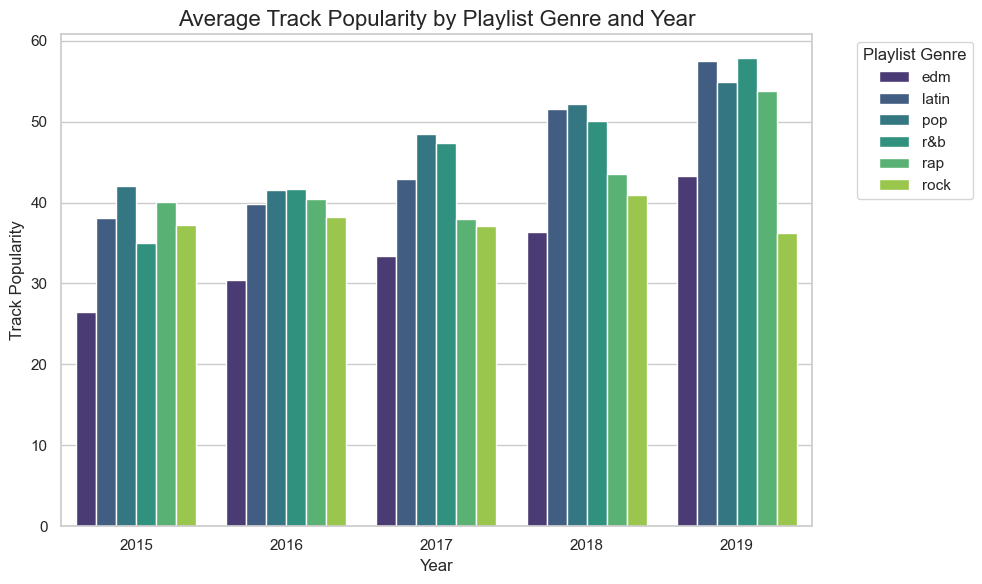

In [94]:
# Create a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=genres,
    x="year",
    y="track_popularity",
    hue="playlist_genre",
    palette="viridis"
)

# Customize the plot
plt.title("Average Track Popularity by Playlist Genre and Year", fontsize=16)
plt.ylabel("Track Popularity")
plt.xlabel("Year")
plt.legend(title="Playlist Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Generally, the music popularity increased from year to year across all music genre except rock. This is surprising because valence and loudness increased but the genre itself is on decreasing trend. 

In [95]:
df_10_yrs.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'year', 'track_name_cleaned', 'duration_s',
       'release_year'],
      dtype='object')

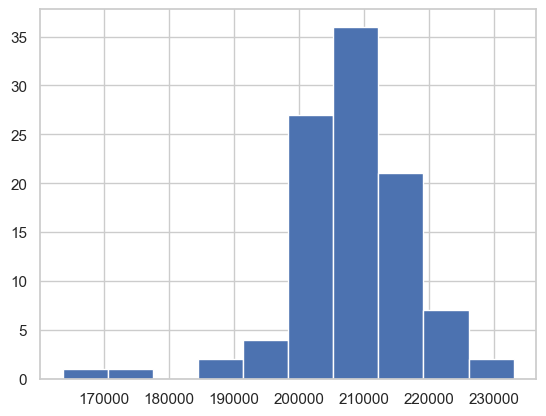

In [96]:
duration_popularity = df_10_yrs.groupby('track_popularity')['duration_ms'].mean()
plt.hist(duration_popularity)
# x: duration
plt.show()